<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_05_ABC_Modelo_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema:

El dataset de casas de California. Es un conjunto de datos que contiene información sobre los precios medios de las viviendas y otras características de los distritos de California, basado en el censo de 1990.



**longitude**: es la longitud del centroide del distrito, expresada en grados. Esta variable indica la posición geográfica del distrito en el mapa.

**latitude**: es la latitud del centroide del distrito, expresada en grados. Esta variable también indica la posición geográfica del distrito en el mapa.

**housing_median_age**: es la edad media de las casas en el distrito, expresada en años. Esta variable refleja el estado y la antigüedad de las viviendas en el distrito.

**total_rooms**: es el número total de habitaciones en el distrito, sin distinguir entre tipos de habitaciones. Esta variable refleja el tamaño y la capacidad de las viviendas en el distrito.

**total_bedrooms**: es el número total de dormitorios en el distrito. Esta variable refleja el número de espacios destinados al descanso en las viviendas del distrito.

**population**: es el número de personas que viven en el distrito. Esta variable refleja la densidad y la demanda de vivienda en el distrito.


**households**: es el número de hogares en el distrito. Un hogar es un grupo de personas que residen dentro de una casa. Esta variable refleja la estructura y la composición de las familias en el distrito.


**median_income**: es el ingreso medio por hogar en el distrito, expresado en miles de dólares ($1000). Esta variable refleja el nivel socioeconómico y el poder adquisitivo de los habitantes del distrito.


**median_house_value**: es el valor medio de las casas en el distrito, expresado en cientos de miles de dólares ($100,000). Esta variable es la variable objetivo que se quiere predecir. Refleja el precio y la calidad de las viviendas en el distrito.


# 1.0 Análisis del data frame

1. Leer el data frame en formato csv en la dirección https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv

2. Entender  el estado de los datos, para ello puedo emplear los comandos básicos del pandas

  ```python
  df.info()
  df.describe()
  df.isnull().sum()
  df.isna().sum()
```
Estos dos últimos son equivalentes.

3. Determinar los elementos únicos dentro de la columna ocean_proximity.


4. Para las columnas

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
```

Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.


5. Construye un histograma para cada columna, puede emplear la libreria de seaborn.

In [1]:
## Librerias

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sympy as sp

In [2]:
## 1) Lectura del DataFrame y compresión de los datos
df = pd.read_csv("https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
### 2) Compresión de los datos
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
df.isnull().sum()

### Se observa que hay 207 filas que no cuenta con información de la cantidad total de habitaciones

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [5]:
df.isna().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [6]:
### Eliminar los elementos vacíos
df_ = df.dropna()

In [7]:
### 3) Determinar los elementos unicos en la columna ocean_proximity
dif_ocean_proximity = df_["ocean_proximity"].unique()

In [8]:
columns = df_.columns
### Cambio del nombre de las columnas para que quede bien
### en la graficación del histograma
def name(x):
  replace = x.replace("_"," ")
  word = ""
  for i in replace:
    word += i.title()
  return word.title()

new_name = list(map(name, columns))
df_.columns = new_name

In [9]:
### 4) Promedio de estas variables de interes
cols = ["housing_median_age",    "total_rooms",    "total_bedrooms",    "population",    "households",    "median_income",    "median_house_value"]
new_interest = list(map(name,cols))
df_[new_interest].groupby(by = df_["Ocean Proximity"]).mean() ### Sacar el promedio de cada variable dado la agrupación

,Housing Median Age,Total Rooms,Total Bedrooms,Population,Households,Median Income,Median House Value
Ocean Proximity,,,,,,,
<1H OCEAN,29.277397,2627.233451,546.539185,1518.440447,517.419083,4.231101,240267.990812
INLAND,24.262623,2721.252925,533.881619,1392.411484,478.006927,3.210359,124896.863147
ISLAND,42.400000,1574.600000,420.400000,668.000000,276.600000,2.744420,380440.000000
NEAR BAY,37.756388,2490.335242,514.182819,1227.881057,487.236123,4.175647,259279.292070
NEAR OCEAN,29.314688,2587.165525,538.615677,1355.637367,501.528919,4.006374,249042.355023


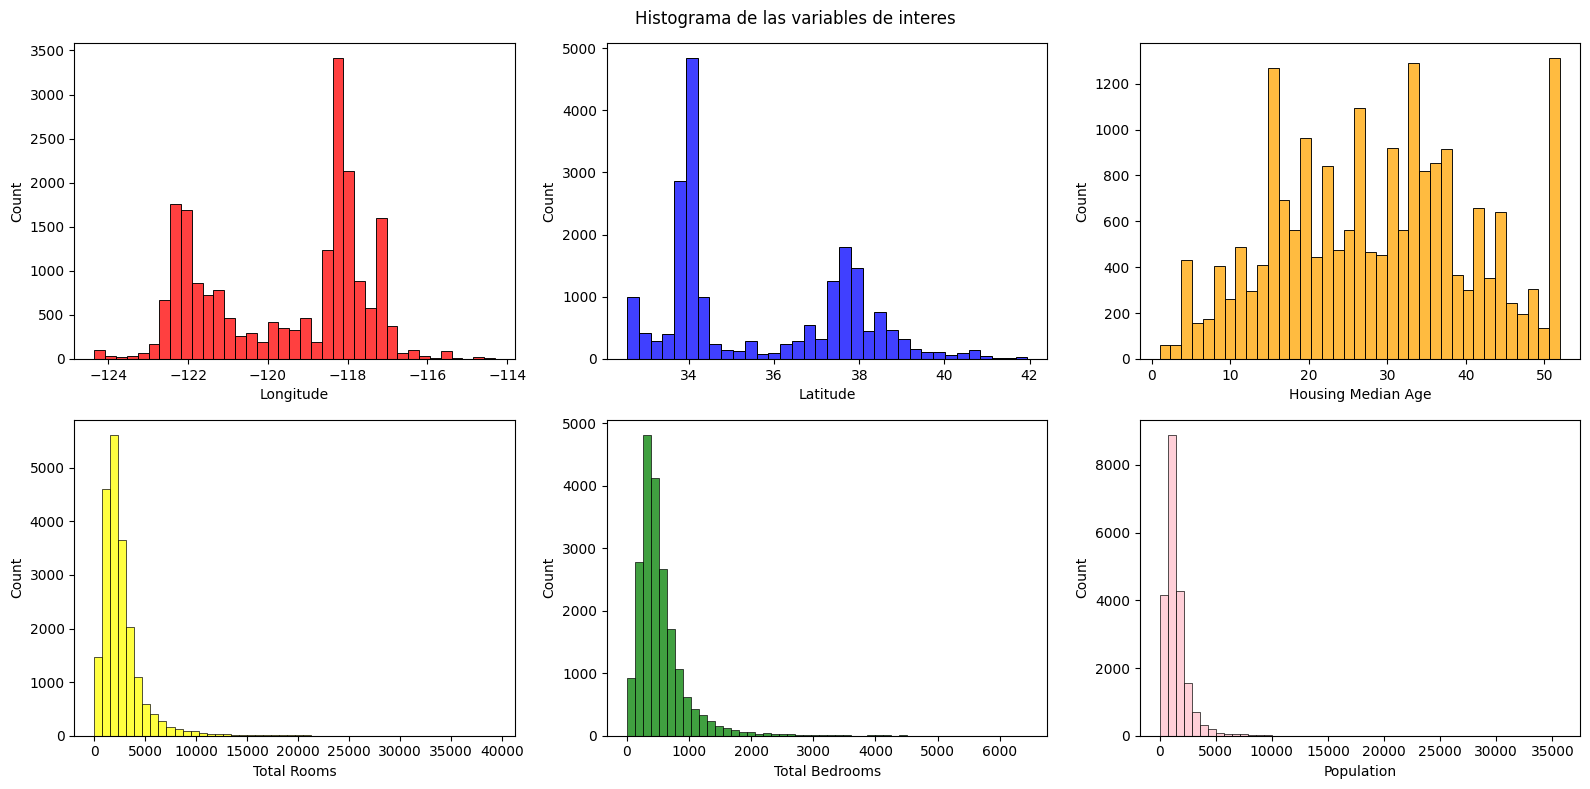

In [10]:
### 5) Construcción del histograma usando seasborn
### Como hay 10 graficas, se realizará en un subplot dividido en dos niveles.

fig,ax = plt.subplots(2,3, figsize = (16,8))

colores = ["red","blue","orange","yellow","green","pink"]

for i in range(6):
  if i < 3:
    sns.histplot(df_[new_name[i]] ,ax = ax[i//3, i%3], color = colores[i])
  else:
    sns.histplot(df_[new_name[i]] ,ax = ax[(i)//3, (i)%3], color = colores[i], bins = 50)
plt.suptitle("Histograma de las variables de interes")
plt.tight_layout()

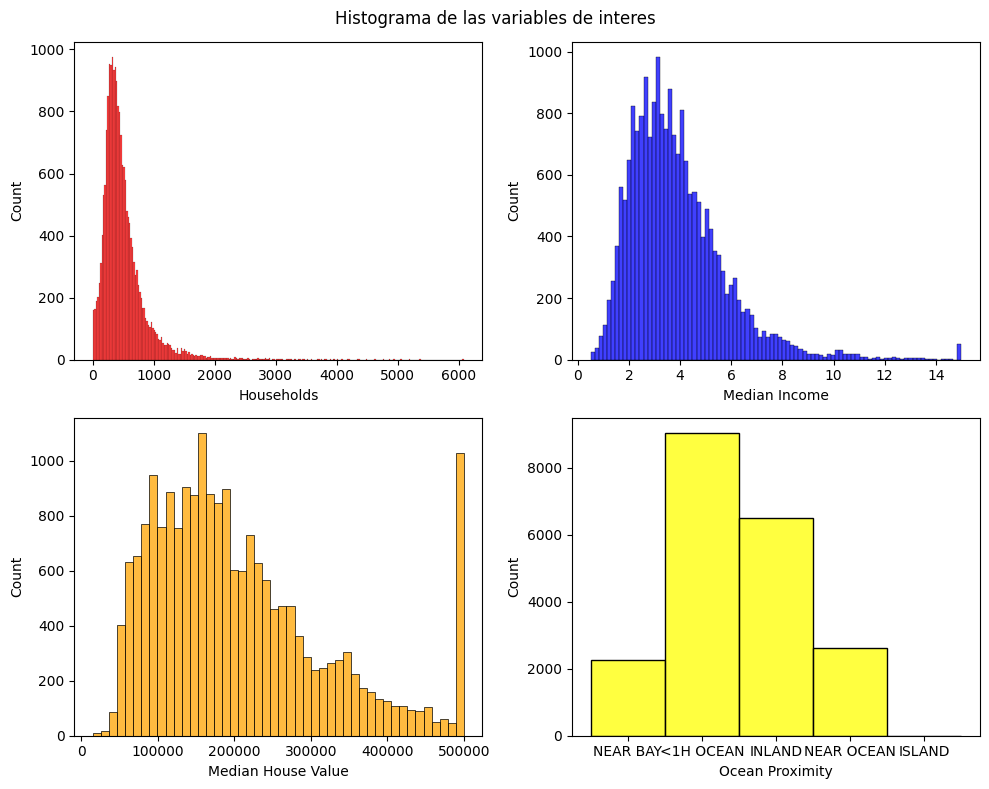

In [11]:

fig, ax_ = plt.subplots(2,2, figsize = (10,8))

for i in range(6,10,1):
    sns.histplot(df_[new_name[i]] ,ax = ax_[(i-6)//2, (i-6)%2], color = colores[i-6])
plt.suptitle("Histograma de las variables de interes")
plt.tight_layout()

### [Diagrama de caja](https://en.wikipedia.org/wiki/Box_plot)


### Diagrama de caja

![box](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png)



### Interpretación de un diagrama de caja

- Desde el minimo al valor más bajo de la caja: primer cuartil, 25% de los datos
- Desde el valor más bajo de la caja hasta la mediana: segundo cuartil, 25% de los datos
- Desde la mediana hasta el valor mas alto de la caja : tercer cuartil, 25% de los datos
- Desde el valor mas alto de la caja hasta el máximo: Cuarto  cuartil, 25% de los datos


El rango intercuartil $IQR = Q_3-Q_1$ permite definir que datos pueden ser atípicos, basado en los siguientes limites:

$Max = Q3 + 1.5IQR$

$Min = Q1 - 1.5IQR$



El cuartil puede ser determinado como sigue:

Para calcular los cuartiles de una lista de números:

- Ordenar los números de menor a mayor.
- Calcular la posición de cada cuartil usando la fórmula: Q = a (N+1) / 4, donde Q es la posición del cuartil, a es el número del cuartil (1, 2 o 3), y N es el número total de datos.
- Si la posición del cuartil es un número entero, el valor del cuartil es el dato que está en esa posición.
- Si la posición del cuartil es un número decimal, el valor del cuartil se interpola usando la fórmula: Q = x + d (y - x), donde Q es el valor del cuartil, x es el dato anterior a la posición del cuartil, y es el dato posterior a la posición del cuartil, y d es la parte decimal de la posición del cuartil.


Veamos un ejemplo:



In [12]:
T = np.array([52, 57, 57, 58, 63, 66, 66, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 89])
Tsort = np.sort(T)
print(len(T))
print(f"T sort:{Tsort}")
len(T)/4

24
T sort:[52 57 57 58 63 66 66 67 67 68 69 70 70 70 70 72 73 75 75 76 76 78 79 89]


6.0

88.5
52.5


{'whiskers': [<matplotlib.lines.Line2D at 0x790870090b10>,
 'caps': [<matplotlib.lines.Line2D at 0x790870091e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x79087004b090>],
 'medians': [<matplotlib.lines.Line2D at 0x790870093190>],
 'fliers': [<matplotlib.lines.Line2D at 0x790870093a90>],
 'means': []}

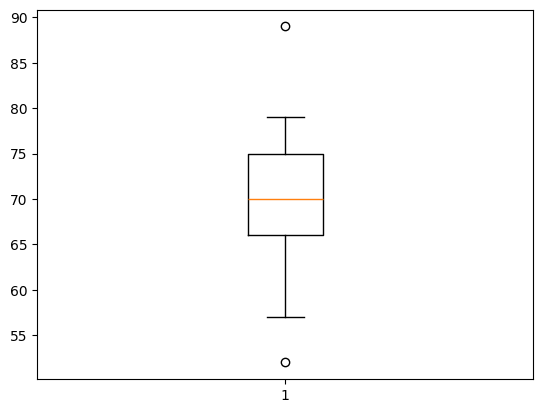

In [13]:

IQR=9
max_ = 75 + 1.5*IQR
min_ = 66 - 1.5*IQR
print(max_)
print(min_)
plt.boxplot(T)

7. Empleando el siguiente código realiza el gráfico boxplot,
```python
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()
```

In [14]:
### 7) construcción de un diagrama de caja
datos = df_["Median House Value"]
datos = np.array(datos)
### Organización de los datos menor a mayor
datos_sort = np.sort(datos)

### Determinación de la posición del quartil

def Quartil(x,a):
  N = len(x)
  Q = a * ( (N+1) / 4 )
  if (Q - int(Q)) == 0:
    return x[int(Q)]
  else:
    d = Q - int(Q)
    x_ = x[int(Q)-1]
    y = x[int(Q)+1]
    Q_ = x_ + d*(y-x_)
    return Q_

Q1 = Quartil(datos_sort,1)
Q2 = Quartil(datos_sort,2)
Q3 = Quartil(datos_sort,3)

Q1,Q2,Q3


(np.float64(119500.0), np.float64(179800.0), np.float64(264750.0))

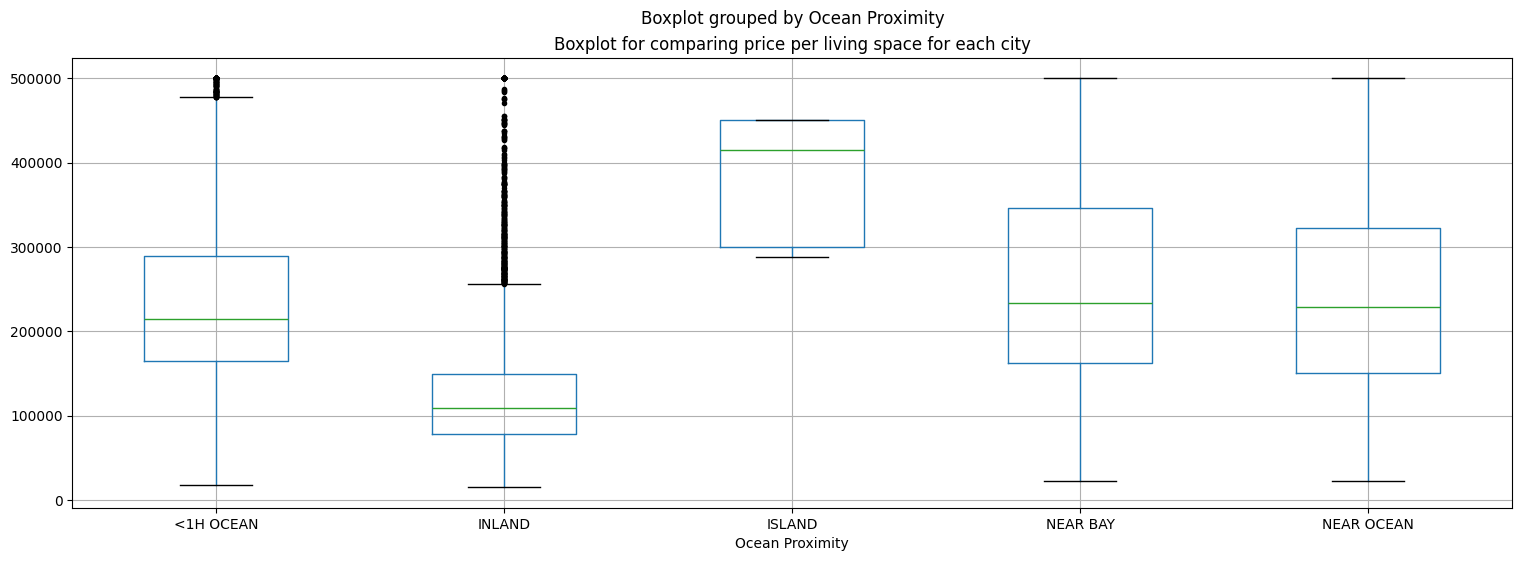

In [15]:
# draw boxplot
df_.boxplot(column = "Median House Value",by='Ocean Proximity', sym = 'k.', figsize=(18,6))
# set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()

In [16]:
### Determinación de aquellos datos atipicos y su respectiva eliminación.

val1 = df_["Ocean Proximity"].unique()[1]
val2 = df_["Ocean Proximity"].unique()[2]
#===== Datos medio del valor de la casa, dados las categorias <1H OCEAN y  INLAND ===== #

data1 = df_["Median House Value"][df_["Ocean Proximity"] == val1]
data2 = df_["Median House Value"][df_["Ocean Proximity"] == val2]

# ===== Determinación de los cuantiles ===== #

Q1_data1 = data1.quantile(0.25)
Q3_data1 = data1.quantile(0.75)
Q1_data2 = data2.quantile(0.25)
Q3_data2 = data2.quantile(0.75)

# ===== Rango intercuartilico ======= #

IQR_data1 = Q3_data1 - Q1_data1
IQR_data2 = Q3_data2 - Q1_data2

# ===== Criterios de datos atipicos ====== #

max_data1 = Q3_data1 + 1.5*IQR_data1
min_data1 = Q1_data1 - 1.5*IQR_data1
max_data2 = Q3_data2 + 1.5*IQR_data2
min_data2 = Q1_data2 - 1.5*IQR_data2

# ===== Determinación de los datos atipicos ===== #
index_ocean_atipic = data1[(data1 < min_data1)|(data1 > max_data1)].index
index_inland_atipic =  data2[(data2 < min_data2)| (data2 > max_data2) ].index

df2 = df_.copy()

# ===== Eliminación de los datos atipicos ===== #

df2.drop(index_ocean_atipic, inplace = True)
df2.drop(index_inland_atipic, inplace = True)

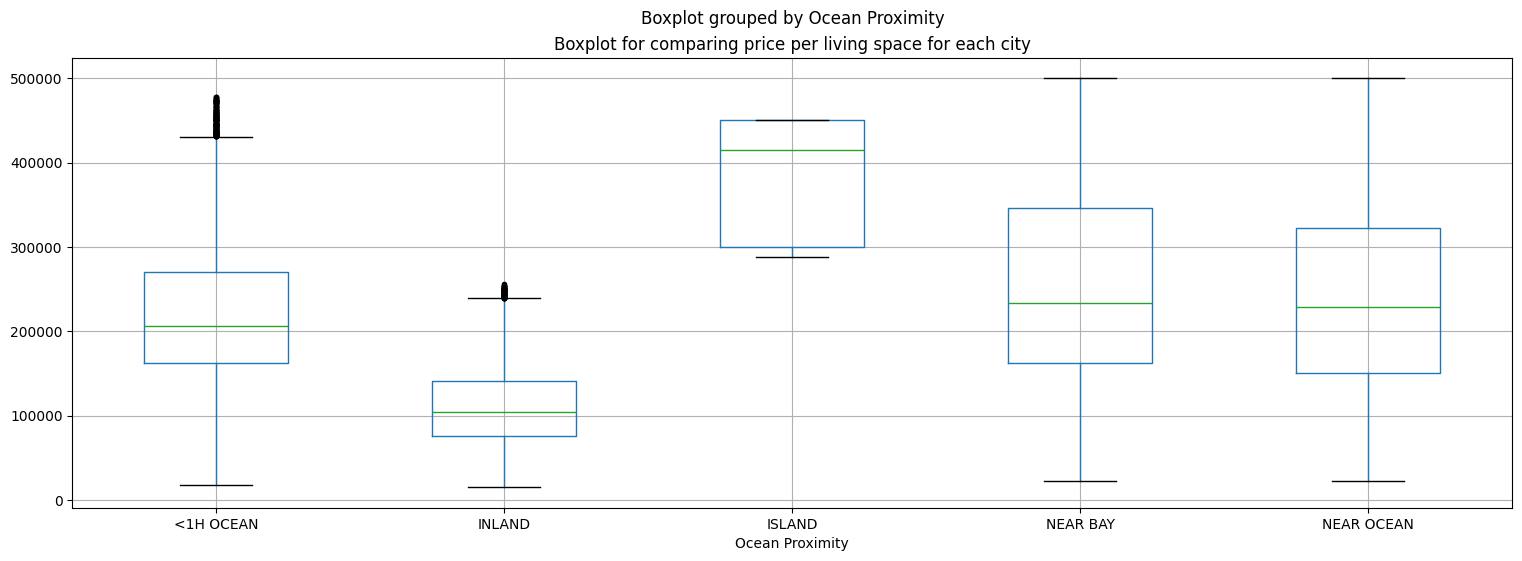

In [17]:
# draw boxplot
df2.boxplot(column = "Median House Value",by='Ocean Proximity', sym = 'k.', figsize=(18,6))
# set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()

8. Determina la matrix de correlación.

### [Matrix de correlación](https://en.wikipedia.org/wiki/Correlation)

¿Como se determina la matrix de correlación?

![Matrix de correlación](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png)



```python
corr_matrix = df.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()
```

In [18]:
## 8) Matriz de correlación
corr_matrix = df_.iloc[:, 0:9].corr()
corr_matrix

,Longitude,Latitude,Housing Median Age,Total Rooms,Total Bedrooms,Population,Households,Median Income,Median House Value
Longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
Latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
Housing Median Age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
Total Rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
Total Bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
Population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
Households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
Median Income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
Median House Value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


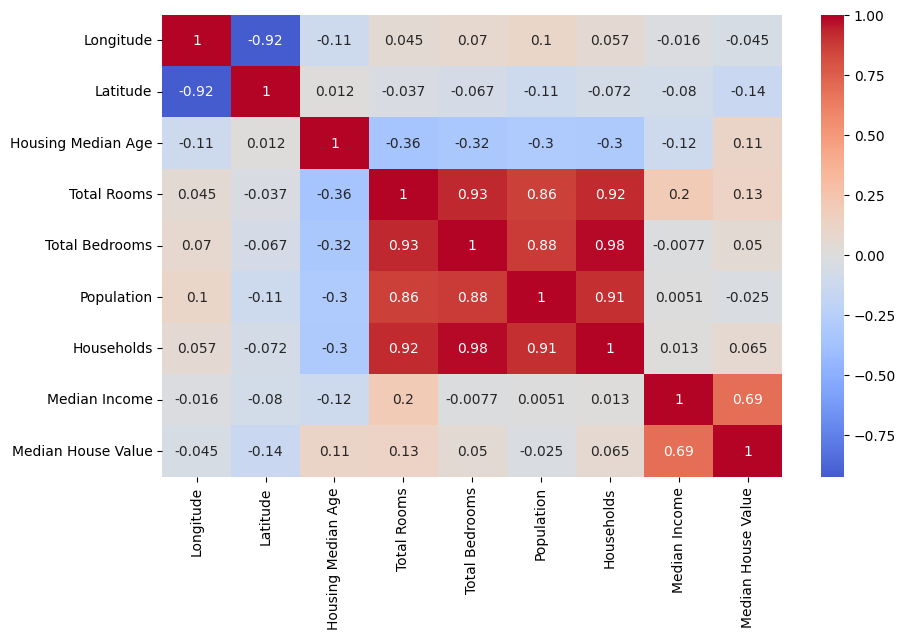

In [19]:
## visualización grafica de la matriz de correlación
plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()

9. con las columnas, realiza un grafico pairplot empleando seaborn  de python.
```python
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
```

10. Realizaun scatter plot con la libreria sea born de python, el color del grafico puede ser empleado con la columna median_house_value

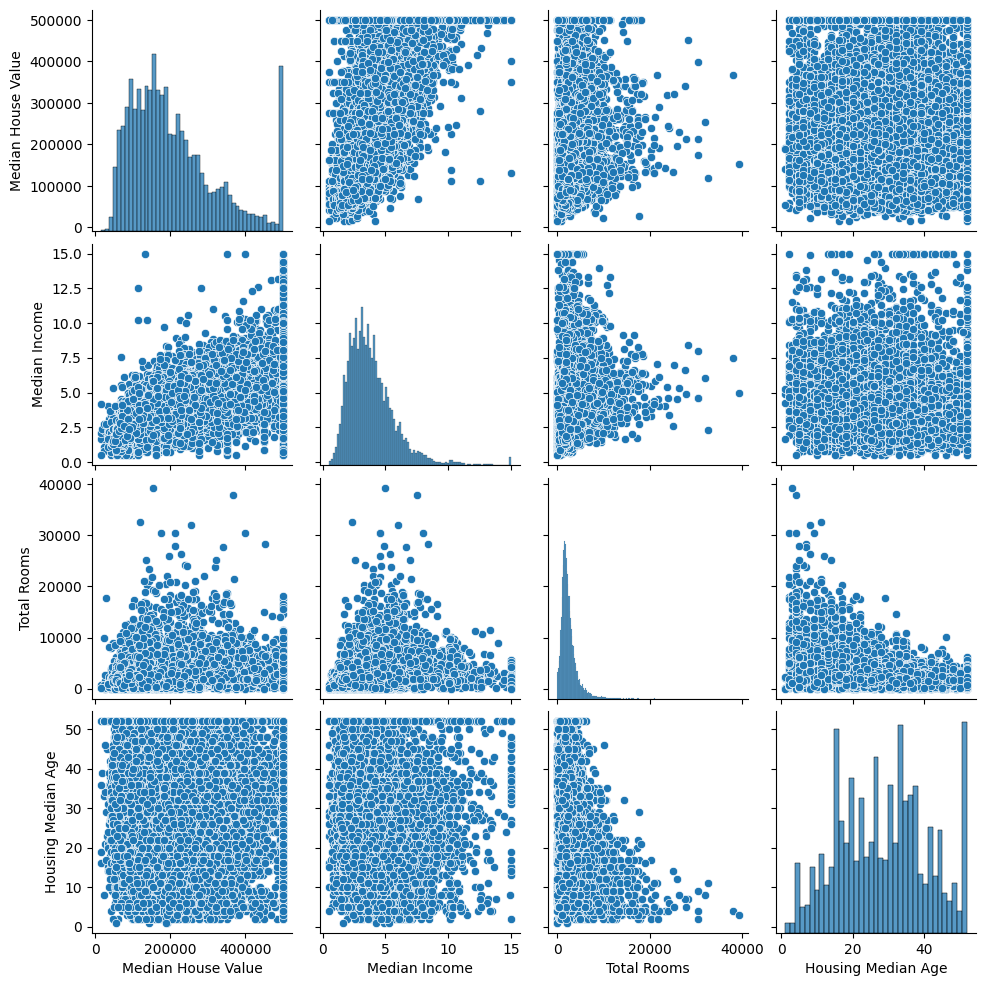

In [20]:
### 9) Grafico pairplot
columnas = ["Median House Value", "Median Income", "Total Rooms","Housing Median Age"]
sns.pairplot(df_[columnas])

<Axes: xlabel='Median Income', ylabel='Median House Value'>

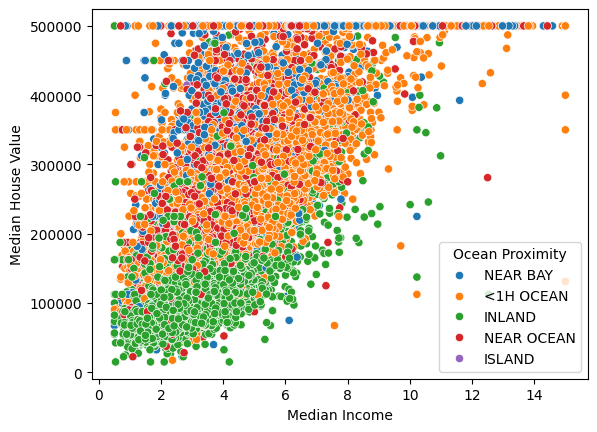

In [21]:
### 10) Grafico scatter empleando la librería seasborn
sns.scatterplot(data = df_, x = "Median Income", y = "Median House Value", hue = "Ocean Proximity")

<Axes: xlabel='Median Income', ylabel='Total Rooms'>

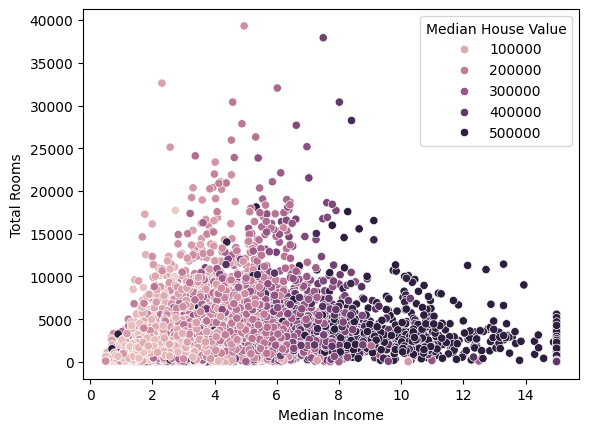

In [22]:
### 10) Grafico scatter empleando la librería seasborn
sns.scatterplot(data = df_, x = "Median Income", y = "Total Rooms", hue = "Median House Value")

<Axes: xlabel='Housing Median Age', ylabel='Total Rooms'>

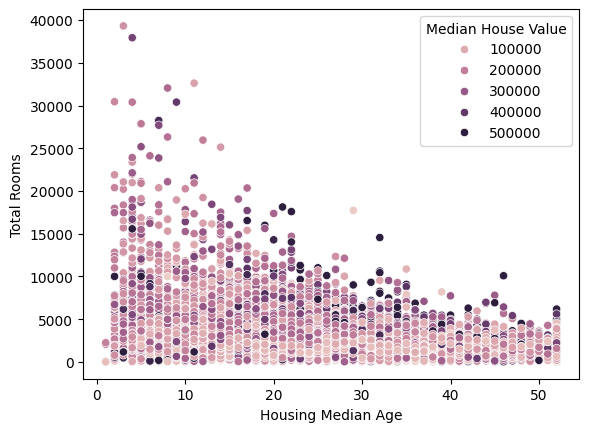

In [23]:
### 10) Grafico scatter empleando la librería seasborn
sns.scatterplot(data = df_, x = "Housing Median Age", y = "Total Rooms", hue = "Median House Value")

#2.0 Preparacion del data frame

## Evitar el data *Snooping bias*.

En algunos casos se sugiere dividir los datos en entrenamiento y test desde el principio dado que el cerebro puede sobreajustar el dataset y los resultados no significativos se pueden volver significativos. El procedimiento correcto es probar cualquier hipótesis en un conjunto de datos que no se utilizó para generar las hipótesis inicial.


## *Sampling bias*

Si el dataset es lo suficientemente grande un muestreo aleatorio de la muestra puede ser considerado, sin embargo si la muestra es pequena se debe garantizar homegeniedad en el dataset de entrenamiento.


Ejemplo:

Por ejemplo, la población de EE. UU. esta compuesto por un 51,3 % de mujeres y un 48,7 % de hombres, por lo que una encuesta bien realizada en EEUU
trata de mantener esta proporción en la muestra: 513 mujeres y 487 hombres. Esto se llama muestreo estratificado(stratified sampling): la población se divide en subgrupos homogéneos llamados estratos(strata), y se muestrea el número correcto de instancias de cada estrato para garantizar que el
El conjunto de prueba es representativo de la población general. Si usaran muestras puramente aleatorias, habría alrededor del 12% de posibilidades de muestrear un conjunto de prueba sesgado con menos del 49% de mujeres o más del 54% de mujeres. De cualquier manera, los resultados de la encuesta serían
significativamente sesgada.


11. ¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?


```python
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

```




In [24]:
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

16512
4128


La documentación de está libreria se encuentra en:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

De la documentación, se puede observar que el dataframe df_, está siendo partido con la siguiente proporción:
El 20% de los datos se están asignando para la prueba y el 80% para el entrenamiento del modelo de Machine Learning.
Ahora, el estado aleatorio controla como va a ser la mezcla de los distintas clases o configuraciones que pertenence a nuestro conjunto de datos cuando estos son divididos. En el caso de asignar random_state = 42 (esto es ún número definido por una construmbre popular) y permite poder controlar como será el muestreo, es decir, si nuevamente queremos hacer el muestreo se hará con el mismo orden.

12. División del dataset en grupos:


La siguiente división puede ser realizada  basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:

```python
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()


```

La forma automatica de realizar la división puede ser la siguiente:

```python
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

```


Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

```python
df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)
```

un comparativo general puede ser estructurado de la siguente forma, analiza  los errores:

```python
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
```

<Axes: >

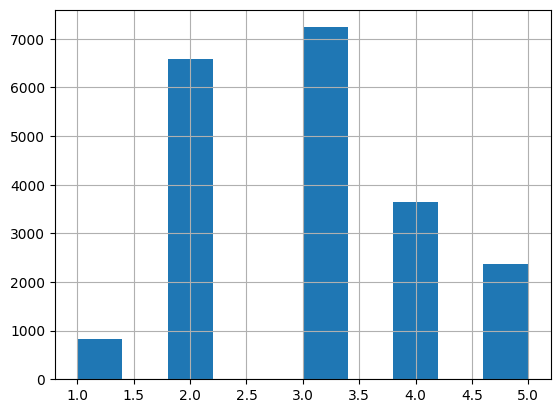

In [25]:
## 12) División del dataset en grupos.

# ===== Metodo manual de la división ===== #
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()

In [26]:
df["income_cat"]

,income_cat
0,5
1,5
2,5
3,4
4,3
...,...
20635,2
20636,2
20637,2
20638,2


El anterior codigo lo que está realizando es dividiendo el valor que gana las personas en cinco niveles.
1. _Primer nivel_ : aquellas personas que ganan (0,1.5] miles de dolares en el mes.
2.  _Segundo nivel_ : aquellas personas que ganan (1.5,3] miles de dolares en el mes.
3.  _Tercer nivel_ : aquellas personas que ganan (3,4.5] miles de dolares en el mes.
4.  _Cuarto nivel_ : aquellas personas que ganan (4.5,6] miles de dolares en el mes.
5.  _Quinto nivel_ : aquellas personas que ganan (6,$∞$) miles de dolares en el mes.

Basicamente el ultimo nivel es para meter en aquella categoría cualquier persona que gane más de 6 mil dolares en el mes.

In [27]:
# ===== Forma automatica de hacer la división ====== #

from sklearn.model_selection import StratifiedShuffleSplit

# StratifiedShuffleSplit Mexcla estratificada dada la partición.

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

# ===== n_splits = 1 ===== # Indica las particiones independientes que se quieren producir.

for train_index, test_index in split.split(df, df["income_cat"]):
# =====Partir el DataFrame df_, en las categorías de cada dato df_["Income Cat"] categoría indicada anteriormente ===== #

  strat_train_set = df.loc[train_index]

# ===== strat_train_set estratificación del dataframe para los indices de entramineto ===== #

  strat_test_set = df.loc[test_index]

# ===== strat_test_set estratificación del dataframe para los indices de la prueba ===== #

Nota, en el anterior codigo se empleo el DataFrame df, sin haber eliminado anteriormente los datos que son nulos

In [28]:

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)

train_set["income_cat"].value_counts() / len(train_set)

,count
income_cat,
3,0.348716
2,0.324188
4,0.173147
5,0.114159
1,0.039789


Si comparamos las anteriores dos lineas de codigo, observamos que del ochenta por ciento de los datos que se están empleando para el entrenamiento la proporción de cada categoría empleada para el entrenamiento sigue la misma proporciones que estás cateogorías en el conjunto de datos.
Garantizando una muestra significativa del conjunto de datos

In [29]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)

In [30]:
compare_props
# == Aquí se obtiene el error relativo aleatorio y estratificado para cada clase, en cada
# tipo de mustreo == #

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,0.015195
3,0.350581,0.350533,0.358527,2.266446,0.013820
4,0.176308,0.176357,0.167393,5.056334,0.027480
5,0.114438,0.114341,0.109496,4.318374,0.084674


13. Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:
```python
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]
```




# Limpieza de datos

Lo que sigue son códigos que pueden servir para limpiar los datos.

```python

df.isnull().sum()


#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()


q=pd.DataFrame(q)

q.isnull().sum()

```

##imputer

Forma automática para tratar los datos (Asegurate de trabajar con las columnas numéricas):


```python
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

df_train_num = df_train.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_
```





In [31]:
# 13) Agregas nuevas variables al analisis

train_set["rooms_per_household"] = train_set["total_rooms"]/train_set["households"]
train_set["bedrooms_per_room"] = train_set["total_bedrooms"]/train_set["total_rooms"]
train_set["population_per_household"]=train_set["population"]/train_set["households"]

# ==== Estó está siendo agregado al set de entrenamiento ==== #


In [32]:
### Primera metodología de limpieza

### Reemplazar los datos vacíos con la media de los datos.

median = train_set["total_bedrooms"].median()
q = train_set["total_bedrooms"].fillna(median).copy()


q =  pd.DataFrame(q)

q.isnull().sum()

,0
total_bedrooms,0


In [33]:
## Vemos que las unicas variables donde hay datos nulos es para total_bedrooms.

# Segunda Metodología de limpieza, eliminar todos aquellos datos nulos
mask_null = df.isnull()

p = train_set.dropna(subset=["total_bedrooms"]).copy()

In [34]:
from sklearn.impute import SimpleImputer
# imputer = Imputer(strategy="median")

set_train_num = train_set.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(set_train_num)

imp_mean.statistics_

array([-1.19582290e+02,  3.56431492e+01,  2.86082849e+01,  2.64200478e+03,
        5.38496851e+02,  1.42645300e+03,  4.99986919e+02,  3.88075426e+00,
        2.07194694e+05,  3.01296027e+00,  5.43523502e+00,  2.12857974e-01,
        3.09696119e+00])

La anterior linea de codigo está tratando los datos, llenando aquellos espacios vacíos por el valor medio, tal cual como se realizó anteriormente.
Antes de hacerlo, se tuvo que retirar aquella columna con variables categoricas para que no vayamos a tener algún tipo de confunsión con los datos.

14. Compara las siguientes variables:
```python
imp_mean.statistics_
df_train_num.median()
```


```python
Constuye la matriz de características:

X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
```





In [35]:
set_train_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'income_cat', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [36]:
# === Redefiniendo un DataFrame2, con aquellas variables extras empleadas en el entrenamiento
# que no fueron definidias originalmente en el dataframe df === #
df2 = df.copy()
df2["income_cat"] = pd.cut(df2["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
df2["rooms_per_household"] = df2["total_rooms"]/df2["households"]
df2["bedrooms_per_room"] = df2["total_bedrooms"]/df2["total_rooms"]
df2["population_per_household"]=df2["population"]/df2["households"]
df2.drop("ocean_proximity", axis=1, inplace = True)

In [37]:
datos_pandas = set_train_num.describe().loc["mean"]
X = imp_mean.transform(df2)
print(X)
housing_tr = pd.DataFrame(X, columns= set_train_num.columns)

[[-122.23         37.88         41.         ...    6.98412698
     0.14659091    2.55555556]
 [-122.22         37.86         21.         ...    6.23813708
     0.15579659    2.10984183]
 [-122.24         37.85         52.         ...    8.28813559
     0.12951602    2.80225989]
 ...
 [-121.22         39.43         17.         ...    5.20554273
     0.21517303    2.3256351 ]
 [-121.32         39.43         18.         ...    5.32951289
     0.21989247    2.12320917]
 [-121.24         39.37         16.         ...    5.25471698
     0.22118492    2.61698113]]


In [38]:
ele = pd.Series(imp_mean.statistics_, index = set_train_num.columns)
for i in range(len(imp_mean.statistics_)):
  if i<9:
    print(imp_mean.statistics_[i] == datos_pandas.iloc[i])
  elif i ==9:
    pass
  else:
    print(imp_mean.statistics_[i] == datos_pandas.iloc[i-1])

True
True
True
True
True
True
True
True
True
True
True
True


En la anterior comparación dato a dato, vemos que son exactamente los mismos datos obtenidos por los distintos metodos.


# Manejo de texto y atributos categóricos
15.  ¿Qué realizan las siguientes lineas de código?

```
from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)
```




In [39]:
from sklearn.preprocessing import OneHotEncoder
train_set["ocean_proximity"].unique()
housing_cat= train_set[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


# Explicación de la anterior lineas de codigo.

Estas lineas de codigo lo que están haciendo es un tratamineto para las variables categoricas, en nuestro caso es el tratamiento de la variable "ocean_proximity" la cual cuenta con las siguientes categorías:
```python
["<1H OCEAN","INLAND","ISLAND","NEAR BAY","NEAR OCEAN"]
```
Para cada categoría se "crea" un vector columna (esto es la forma de convertir en binarios las variables categoricas mediante el metodo OneHotEncoder) en la linea de codigo:

```python
cat_encoder = OneHotEncoder(sparse_output=False)
```
_Nota:_ _Se emplea el comando "sparse_output= False", para indicarle a OneHotEncoder que se desea una matriz densa de numpy array y no una matriz dispersa_


Anteriormente indique que se "crea" un vector columna para cada categoria, precisemos que es esto.

A la j-esima categoría se le asigna la j-esíma columna de la matriz de tamaño $(n \times m)$, donde $n$ indica la cantidad de datos disponibles y $m$ la cantidad de categorias.


Una vez creada aquella matriz, se le aplica el método OneHotEncoder a los datos de entrada, lo cual se realiza en la siguiente linea de codigo:


```python
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
```
Este metodo de OneHotEncoder lo que hace es asignar el valor de 1 en la i,j entrada de la matriz indicada, cuando el dato i-esimo corresponde a la clase j-esima, en dado caso que no haya correspondencia se le asigna un cero.

Esto es lo que se realizó para los datos de entrada "housing_cat", los cuales corresponden al Data Frame creado en la siguiente linea de codigo:

```python
housing_cat = train_set[["ocean_proximity"]]
```

Al Data Frame del conjunto de entramiento se selecciona la columna que contiene la categoría y el doble corchete se emplea para garantizar que aquello sea un DataFrame.



# Escalamiento de variables

16. Las variables pueden ser escaladas como sigue:

```python

cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

```




In [40]:

cols=["longitude", "latitude",    "housing_median_age",    "total_rooms",\
      "total_bedrooms",    "population",    "households",    "median_income",\
      "<1H OCEAN",    "INLAND",    "ISLAND",    "NEAR BAY", "NEAR OCEAN"]


housing_scale = housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

En la anterior linea de codigo se crea una variable de interes:

```python
cols=["longitude", "latitude",    "housing_median_age",    "total_rooms",\
      "total_bedrooms",    "population",    "households",    "median_income",\
      "<1H OCEAN",    "INLAND",    "ISLAND",    "NEAR BAY", "NEAR OCEAN"]
```
En este caso se está expresando explicitamente todas las categorias de la variable "ocean_proximity".Luego, se emplea el Data Frame guardado en la variable _"housing_tr_ " _ para obtener aquellas columnas de interes.
Esto se observa en la siguiente linea de codigo:

```python
housing_scale = housing_tr_[cols]
```
 Cabe señalar que este Data Frame fue uno obtenido a partir de unir dos Data Frames, el primero de ellos fue _"housing_tr"_ el cual se obtuvo a partir haber llenado los datos vacíos del Data Frame df2 (el cual es una copia del Data Frame original df) con el promedio asociado a dicha columna (notese que por eso se debio haber eliminado la variable categorica _"ocean_proximity"_ de _"df2"_ porque el promedio de este tipo de variables carece de sentido alguno).

 El segundo Data Frame corresponde al Data Frame resultado del tratamiento con OneHotEncoder de las variables categoricas del conjunto de entramiento _"train_set"_, por lo mismo aquella tiene una menor dimensión que el Data Frame original _"df"_, y por lo tanto van a haber datos llenados automaticamente con _"Nan"_.

 Ahora a la variable _"housing_scale"_ se reescala, empleando la clase MinMaxScaler(), la cual toma cada variable númerica y la reescala empleando la siguiente formula:

 \begin{equation}
X_{esc}=\frac{X - X_{min}}{X_{max}-X_{min}}
 \end{equation}

 Haciendo que cada variable quede en el intervalo [0,1]


17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.

18. ¿que puede concluir respecto al modelo empleado?
2. ¿El modelo de regresión lineal es valido para lo construido,
3. ¿qué informacion nos da el score?
4. ¿Puede ser ajustado a otro modelo?
5. ¿Como puede autmatizar todo el proceso empleando pipelines?

**Nota:** Como a lo largo del desarrollo de los pasos descritos anteriormente se fue ejecutando cada paso, se repetirá los pasos simplemente para construir la "automatización" que empleará el modelo lineal, y se evaluará aquel modelo que tanto puede predecir alguna variable de interes.

Exactamente en función de todos los datos disponibles queremos predecir cuanto será el ingreso medio del hogar ("median_income") y también el valor medio de la casa ("median_house_value") cada uno con una regresión lineal, que posteriormente será comparado con un arbol de decisión.

In [41]:
# Librerías extras
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [54]:
## 1) Lectura de los datos.

DF = pd.read_csv("https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv")
DF2 = DF.copy()
DF3 = DF.copy()

## 2) Partición de las columnas en base del tipo de transformación

cat_cols = ["ocean_proximity"]
num_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households','median_house_value']
num_cols2 = ['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income']

#=== Variables objetivos a predecir ===#

objetivo1 =  "median_income"
objetivo2 = "median_house_value"

## 3) Definición de las transformaciones a emplear.

trans_num = SimpleImputer(strategy = "mean")
trans_cat = OneHotEncoder(sparse_output = False)

## 4) Creación de una cadena de pasos con PipeLine, asociado a distintas columnas

#=== Regresión lineal===#
proceso1 = ColumnTransformer([
    ("num", trans_num, num_cols),
    ("cat", trans_cat, cat_cols)
])

#=== Árbol de decisión ===#
proceso2 = ColumnTransformer([
    ("num", trans_num, num_cols2),
    ("cat", trans_cat, cat_cols)
])

#=== Creación del Pipeline con la regresión lineal ===#
pipeline = Pipeline([
    ("proceso", proceso1),
    ("modelo", LinearRegression())
])

#=== Creación del Pipeline con el arbol de decisión===#
pipeline2 = Pipeline([
    ("proceso", proceso2),
    ("modelo", DecisionTreeRegressor())
])

## 5) Partición de los datos, en función de datos de entrenamiento y prueba, además por cada variable de interes a predecir.

#=== Objetivo ingreso medio ===#

X_1 = DF2.drop(columns = [objetivo1])
y_1 = DF[objetivo1]

#=== Objetivo valor medio de la casa===#

X_2 = DF3.drop(columns = [objetivo2])
y_2 = DF[objetivo2]

#=== Partición de los datos por datos de entrenamiento y prueba ===#

X_1_train,X_1_test,Y_1_train,Y_1_test = train_test_split(X_1,y_1,test_size = 0.2, random_state = 42)

X_2_train,X_2_test,Y_2_train,Y_2_test = train_test_split(X_2,y_2,test_size = 0.2, random_state = 42)


## 6) Aplicación del conjunto de pasos y modelo

pipeline.fit(X_1_train,Y_1_train)

pipeline2.fit(X_2_train,Y_2_train)

## 7) Predicciones con el modelo empleado

y_pred_1 = pipeline.predict(X_1_test)

y_pred_2 = pipeline2.predict(X_2_test)

## 8) Evaluación del modelo

#=== Medición del error para la regresión lineal===#
mse_1 = mean_squared_error(Y_1_test,y_pred_1)
#=== Medición del error empleando score que coeficiente de determinación de los datos===#
mse_1_ = pipeline.score(X_1_test,Y_1_test)

#=== Medición del error para el arbol de decisión con aquel modelo score===#
mse_2_ = pipeline2.score(X_2_test,Y_2_test)